In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('data/cacao_flavors.csv')

In [3]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [4]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [40]:
cacao.columns = ['bar_id', 'company',
       'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin']
cacao.columns

Index(['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')

1795


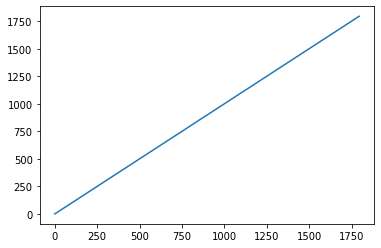

In [7]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [41]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

In [9]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
...,...
Malmo,1
Friis Holm,1
Artisan du Chocolat (Casa Luker),1
Rancho San Jacinto,1


In [10]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [42]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
...,...
Malmo,1
Friis Holm,1
Artisan du Chocolat (Casa Luker),1
Rancho San Jacinto,1


Значений, встретившихся в столбце более 10 раз: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [43]:
display(pd.DataFrame(cacao.specific_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.specific_origin.value_counts()>10).sum())
cacao.loc[:, ['specific_origin']].info()

,specific_origin
,58
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
...,...
"Orinoqua Region, Arauca",1
Lanquin Estate,1
"Camino Verde, Guayas",1
"Chuno, triple turned, Xoco",1


Значений, встретившихся в столбце более 10 раз: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   specific_origin  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

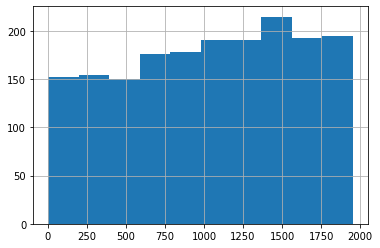

In [13]:
cacao.ref.hist()
cacao.ref.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

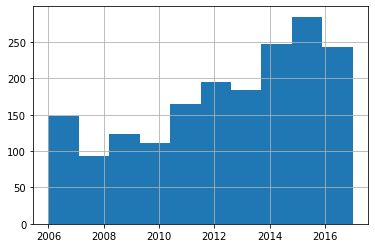

In [14]:
cacao.review_date.hist()
cacao.review_date.describe()

In [15]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [44]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

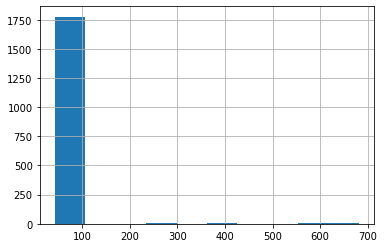

In [45]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


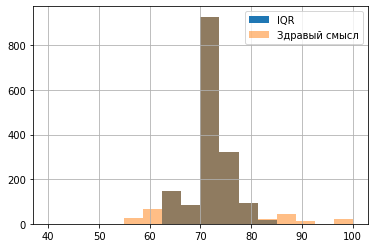

In [46]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [47]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

In [48]:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [21]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Martinique,1
Niacragua,1
Eucador,1
Suriname,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


In [22]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

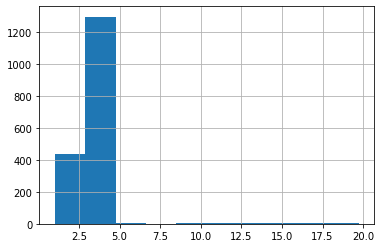

In [49]:
cacao.rating.hist()
cacao.rating.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


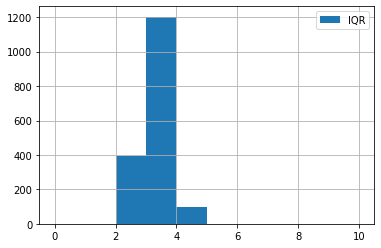

In [50]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

In [25]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [26]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [51]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
,875
Trinitario,415
Criollo,151
Forastero,87
Forastero (Nacional),52
Blend,41
"Criollo, Trinitario",38
Forastero (Arriba),37
Criollo (Porcelana),10
"Trinitario, Criollo",9


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  1775 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


In [52]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [53]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
,875
Trinitario,419
Forastero,195
Criollo,169
Blend,41
"Criollo, Trinitario",38
"Trinitario, Criollo",9
Nacional,5
Matina,3
EET,3


Значений, встретившихся в столбце более 10 раз: 6
Уникальных значений: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  1775 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


**broad_origin**

In [57]:
cacao.broad_origin = cacao.broad_origin.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' else x )

In [67]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()


,broad_origin
Venezuela,212
Ecuador,192
Peru,166
Madagascar,141
DominicanRepublic,141
...,...
"Ghana,Madagascar",1
Burma,1
"Venezuela,Java",1
Nigeria,1


Значений, встретившихся в столбце более 10 раз: 26
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1775 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


In [63]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [64]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [65]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,212
Ecuador,192
Peru,166
Madagascar,141
DominicanRepublic,141
,72
Nicaragua,58
Brazil,58
Bolivia,57
Belize,49


Значений, встретившихся в столбце более 10 раз: 26
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1775 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


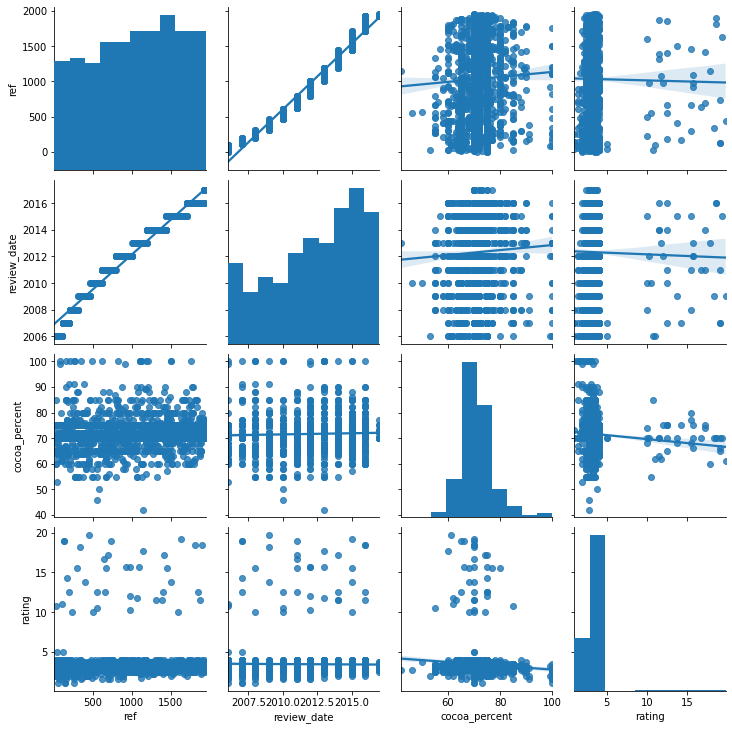

In [68]:
sns.pairplot(cacao, kind = 'reg')